In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

Extracting the data

In [2]:
training_set=torchvision.datasets.FashionMNIST(root="./data",train=True,download=True,
                                          transform=transforms.ToTensor())
testing_set=torchvision.datasets.FashionMNIST(root="./data",train=False,download=True,
                                          transform=transforms.ToTensor())

In [3]:
train_loader=torch.utils.data.DataLoader(training_set,batch_size=100,shuffle=True
                                         ,num_workers=2,pin_memory=True,
                                         drop_last=True)
test_loader=torch.utils.data.DataLoader(testing_set,batch_size=100,shuffle=False)

Part 1- Model 1 for Fashion MNIST

In [4]:
num_of_pixels=28*28
dropout=nn.Dropout(0.2)

Defining a modular neural network

In [50]:
model=torch.nn.Sequential(
    nn.Linear(num_of_pixels,128),
    nn.ReLU(),
    nn.Linear(128,10),
    nn.Softmax(dim=1)
)

In [51]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [53]:
num_of_epochs=40
count=0
for epoch in range(num_of_epochs):
  correct=0
  for images, labels in train_loader:
    count+=1
    input_image=images.view(-1,num_of_pixels)
    outputs=model(input_image)
    loss=loss_function(outputs,labels)
    # Back prop
    optimizer.zero_grad()
    loss.backward()
    # Update weights (optimize)
    optimizer.step()
    # Evaluating the performance
    predictions=torch.max(outputs,1)[1]
    correct+=(predictions==labels).sum().numpy()

  print("Epoch is: {0}, Loss is {1} and Accuracy is: {2}".format(epoch+1,loss.data,100*correct/len(train_loader.dataset)))

print("Finished Training")

Epoch is: 1, Loss is 1.6099271774291992 and Accuracy is: 84.6
Epoch is: 2, Loss is 1.6173672676086426 and Accuracy is: 85.33666666666667
Epoch is: 3, Loss is 1.5985782146453857 and Accuracy is: 86.00333333333333
Epoch is: 4, Loss is 1.6124076843261719 and Accuracy is: 86.49
Epoch is: 5, Loss is 1.6006100177764893 and Accuracy is: 86.755
Epoch is: 6, Loss is 1.5328667163848877 and Accuracy is: 87.05666666666667
Epoch is: 7, Loss is 1.6240676641464233 and Accuracy is: 87.35166666666667
Epoch is: 8, Loss is 1.565992832183838 and Accuracy is: 87.43666666666667
Epoch is: 9, Loss is 1.5625548362731934 and Accuracy is: 87.89
Epoch is: 10, Loss is 1.5711028575897217 and Accuracy is: 88.1
Epoch is: 11, Loss is 1.575728178024292 and Accuracy is: 88.28166666666667
Epoch is: 12, Loss is 1.5774469375610352 and Accuracy is: 88.43166666666667
Epoch is: 13, Loss is 1.5671197175979614 and Accuracy is: 88.765
Epoch is: 14, Loss is 1.580268144607544 and Accuracy is: 88.94333333333333
Epoch is: 15, Loss i

In [81]:
for name, param in model.named_parameters():
  print(name)

0.weight
0.bias
2.weight
2.bias


Producing histogram of weights for the input layer for network 1




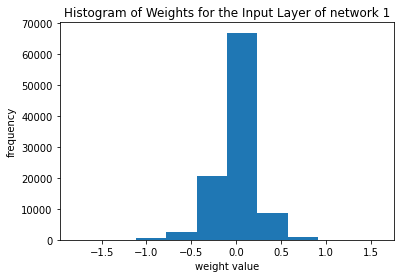

In [156]:
w_input = []
w_hidden = []
with torch.no_grad():
  for name, param in model.named_parameters():
    # Weights for input layer
    if name=="0.weight":
      w_input.append(param.view(-1).detach().numpy())
    # Weights for hidden layer
    if name=="2.weight":
      w_hidden.append(param.view(-1).detach().numpy())

#Weights of Input Layer
plt.hist(w_input)
plt.title('Histogram of Weights for the Input Layer of network 1')
plt.ylabel('frequency')
plt.xlabel('weight value')
plt.show()


Producing histogram of weights for the hidden layer for network 1


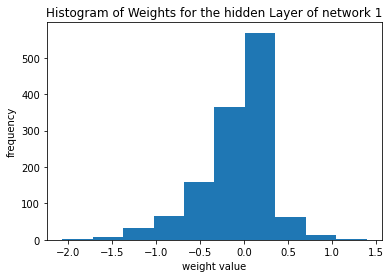

In [157]:
plt.hist(w_hidden)
plt.title('Histogram of Weights for the hidden Layer of network 1')
plt.ylabel('frequency')
plt.xlabel('weight value')
plt.show()

Part 2-Second model for Fashion MNIST

In [21]:
class Neural_Net_2(nn.Module):
  def __init__(self):
    super(Neural_Net_2,self).__init__()
    self.hidden=nn.Linear(num_of_pixels,48)
    self.output=nn.Linear(48,10)

  def forward(self,x):
    x=F.relu(self.hidden(x))
    x=dropout(x)
    x=F.softmax(self.output(x))
    return x

model_2=Neural_Net_2()

In [26]:
loss_function=nn.CrossEntropyLoss()
optimizer_2=torch.optim.Adam(model_2.parameters(),lr=0.001,weight_decay=0.0001)

In [27]:
num_of_epochs=40
count=0
for epoch in range(num_of_epochs):
  correct=0
  for images, labels in train_loader:
    count+=1
    input_image=images.view(-1,num_of_pixels)
    outputs=model_2(input_image)
    loss=loss_function(outputs,labels)
    # Back prop
    optimizer_2.zero_grad()
    loss.backward()
    # Update weights (optimize)
    optimizer_2.step()
    # Evaluating the performance
    predictions=torch.max(outputs,1)[1]
    correct+=(predictions==labels).sum().numpy()

  print("Epoch is: {0}, Loss is {1} and Accuracy is: {2}".format(epoch+1,loss.data,100*correct/len(train_loader.dataset)))

print("Finished Training")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Epoch is: 1, Loss is 1.6507736444473267 and Accuracy is: 72.96666666666667
Epoch is: 2, Loss is 1.658246636390686 and Accuracy is: 81.28166666666667
Epoch is: 3, Loss is 1.679571270942688 and Accuracy is: 83.16666666666667
Epoch is: 4, Loss is 1.5997868776321411 and Accuracy is: 84.16166666666666
Epoch is: 5, Loss is 1.5870060920715332 and Accuracy is: 84.525
Epoch is: 6, Loss is 1.6147762537002563 and Accuracy is: 85.025
Epoch is: 7, Loss is 1.6395553350448608 and Accuracy is: 85.20666666666666
Epoch is: 8, Loss is 1.6458582878112793 and Accuracy is: 85.51
Epoch is: 9, Loss is 1.5585694313049316 and Accuracy is: 85.66166666666666
Epoch is: 10, Loss is 1.5993995666503906 and Accuracy is: 85.885
Epoch is: 11, Loss is 1.5850841999053955 and Accuracy is: 86.11666666666666
Epoch is: 12, Loss is 1.6215792894363403 and Accuracy is: 86.11333333333333
Epoch is: 13, Loss is 1.6135560274124146 and Accuracy is: 86.28666666666666
Epoch is: 14, Loss is 1.5911805629730225 and Accuracy is: 86.3283333

In [95]:
for name, param in model_2.named_parameters():
  print(name)

hidden.weight
hidden.bias
output.weight
output.bias


Producing histogram of weights for the input layer for network 2


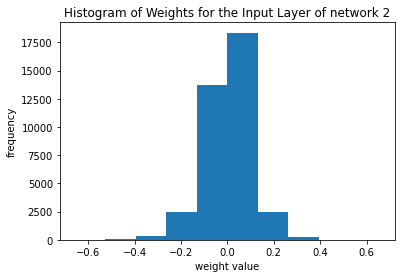

In [158]:
w_input = []
w_hidden = []
for name, param in model_2.named_parameters():
  # Weights for input layer
  if name=="hidden.weight":
    w_input.append(param.view(-1).detach().numpy())
  # Weights for hidden layer
  if name=="output.weight":
    w_hidden.append(param.view(-1).detach().numpy())

#Weights of Input Layer
plt.hist(w_input)
plt.title('Histogram of Weights for the Input Layer of network 2')
plt.ylabel('frequency')
plt.xlabel('weight value')
plt.show()

Producing histogram of weights for the hidden layer for network 2


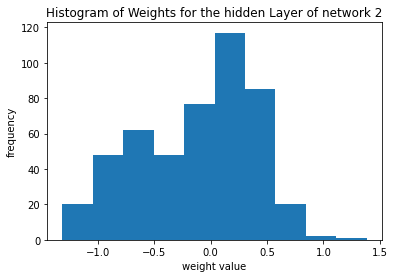

In [159]:
plt.hist(w_hidden)
plt.title('Histogram of Weights for the hidden Layer of network 2')
plt.ylabel('frequency')
plt.xlabel('weight value')
plt.show()

The differences between these histograms of two networks is that, for the second network, the magnitude of weights are reduced and they are more evenly spread due to regularization and dropout